# Centrosome Angle
- This code visualizes the data generated by measuring the angle of displacement between a centrosome's position in interphase and its position in metaphase.
    - This was done using the `imaris point` tool, which allows for the measurement of the angle between 3 points, where point 1 is the centrosome position in interphase, position 2 is the reference point (middle of the cell), and point 3 is the centrosome position in metaphase.
    - These values were manually recorded from Imaris into an excel spreadsheet, which is then fed into this code for visualization.
    - The first plot generated is a `seaborn` plot that visualizes the data as a combination of a `stripplot` and `boxplot`, and the second plot generated uses `matplotlib` to generate radial plots.
- The last cell prints out the results of the stat tests between WT and PP4KO comparisons.  

In [1]:
# Loading in standard libraries and functions

### --- REMOVE PRINT FUNCTION: --- ### 

# Makes it so any variable or statement on it's own line gets printed w/o print()
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

### --- IMPORT LIBRARIES: --- ###

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
from scipy import stats
#import altair as alt
import os
import glob
import matplotlib.patches as mpatches
# We're also going to tell Jupyter to use inline plotting instead of notebook plotting
# It basically means you don't have to use plt.show() in every cell
%matplotlib inline
import re

### --- CONJ 510 SUMMARY TABLES: --- ### 

def percentile(n):
    def percentile_(x):
        return np.percentile(x, n)
    percentile_.__name__ = 'percentile_%s' % n
    return percentile_

#summary = fil.groupby('condition').agg(['mean', 'std', 'min', 'max', 'median', percentile(25), percentile(75), 'skew'])
#summary

### --- IMPORT SCIPY T TEST: --- ###

from math import sqrt
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from scipy.stats import sem
from scipy.stats import t

### --- IND. T-TEST FUNCTION: --- ###
# source: https://machinelearningmastery.com/how-to-code-the-students-t-test-from-scratch-in-python/

def independent_ttest(data1, data2, alpha):
    # calculate means
    mean1, mean2 = mean(data1), mean(data2)
    # calculate standard errors
    se1, se2 = sem(data1), sem(data2)
    # standard error on the difference between the samples
    sed = sqrt(se1**2.0 + se2**2.0)
    # calculate the t statistic
    t_stat = (mean1 - mean2) / sed
    # degrees of freedom
    df = len(data1) + len(data2) - 2
    # calculate the critical value
    cv = t.ppf(1.0 - alpha, df)
    # calculate the p-value
    p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
    # return everything
    return t_stat, df, cv, p

### --- 3D CARTESIAN DISTANCE FUNCTION: --- ###

# AB = sqrt((x2 - x1)^2  +   (y2 - y1)^2   +   (z2 - z1)^2)

def cart3D_dist(x1, x2, y1, y2, z1, z2):
    x_dif = x2-x1
    y_dif = y2-y1
    z_dif = z2-z1
    x_sqr = x_dif**2
    y_sqr = y_dif**2
    z_sqr = z_dif**2
    dist = sqrt(x_sqr + y_sqr + z_sqr)
    return dist

### --- FINDING UNIQUE COMBINATIONS FUNCTION: --- ###

# Based on the mathematical concept of finding unique combinations without selecting the same option again. 
# n is the dataset to be pulled from
# r is the number of data to select from the dataset 
def find_combos(n, r):
    return (math.factorial(n))/((math.factorial(r))*(math.factorial(n-r)))

### --- ANGLE BETWEEN TWO 2D LINES FUNCTION: --- ###

import math

# defining function for calculating angle of rotation between 2 2D lines
def find_angle(m1, m2): 
    angle = math.degrees(math.atan(abs((m1 - m2)/(1 + m1*m2))))
    return angle

### --- SLOPE BETWEEN TWO POINTS ON A 2D LINE FUNCTION: --- ###

# defining a function to calculate slope

def find_slope(y2, y1, x2, x1):
    m = (y2 - y1)/(x2 - x1)
    return m

### --- SET UP FOR A FIGURE: --- ###

# fig1, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(ncols = 2,
#                                                         nrows = 3,
#                                                         sharex = False,
#                                                         sharey = True,
#                                                         figsize = (40,50))

#titlefont = 40 # sets font size 
#axisfont = 30
#plt.rc('xtick', labelsize=25) 
#plt.rc('ytick', labelsize=25) 
#palette = ['#5DADE2', '#EC7063', '#F8C471']
#fig_title = 'ACD Timing in WT and pp4KO neuroblasts'


### --- SET UP FOR CUSTOM LEGENDS --- ###

#colors = ["g", "w"]
#texts = ["Green Data Description", "RedData Description"]
#patches = [ mpatches.Patch(color=colors[i], label="{:s}".format(texts[i]) ) for i in range(len(texts)) ]
#plt.legend(handles=patches, bbox_to_anchor=(0.5, 0.5), loc='center', ncol=2 )


### --- color palettes --- ###

# p = ['#3386FF', '#FF5733'] # classic blue and orange from the rotation saga
# ['#3386FF', '#143566', 'grey'] # hex codes for blue, dark blue, grey
# ['#FF5733', '#99341e', 'grey'] # hex codes for orange, dark orange, grey

### --- PLOT STYLES: --- ###

plt.style.use('fast') # uses seaborn style
#sns.set_style('white') # uses blank white background style (to copy PRISM)

### --- REMOVING DATAFRAME VIEW LIMITS --- ###
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## Command line cells to ensure code is in right directory. 

In [2]:
pwd

'/Users/rcsegura/Desktop/PP4_github/Figure01/CS angle'

In [3]:
ls

2024-05-20 CS angle.ipynb
2024-05-20 CS angles.xlsx
2024-05-20 Fig1 interphase-metaphase angle.ai
2024-05-20 Fig1 interphase-metaphase angle.png
centrosome_angle.png
centrosome_angle.svg
radial_centrosome_angle.png
radial_centrosome_angle.svg
radial_centrosome_angle_alt.png
radial_centrosome_angle_alt.svg
~$2024-05-20 CS angles.xlsx


# Reading in Data

In [4]:
df = pd.read_excel("2024-05-20 CS angles.xlsx", sheet_name = 'python')
df

,image,genotype,nb number,CS,angle,Unnamed: 5
0,WT-Asl-Nb1,WT,1,AC,39.50,NaN
1,WT-Asl-Nb2,WT,2,AC,36.00,NaN
2,WT-Asl-Nb3,WT,3,AC,36.90,NaN
3,WT-Asl-Nb4,WT,4,AC,28.60,NaN
4,WT-Asl-Nb5,WT,5,AC,66.50,NaN
5,WT-Asl-Nb6,WT,6,AC,44.60,NaN
6,WT-Asl-Nb7,WT,7,AC,13.40,NaN
7,WT-Asl-Nb8,WT,8,AC,27.20,NaN
8,WT-Asl-Nb9,WT,9,AC,24.50,NaN
9,WT-Asl-Nb10,WT,10,AC,20.90,NaN


# Plotting

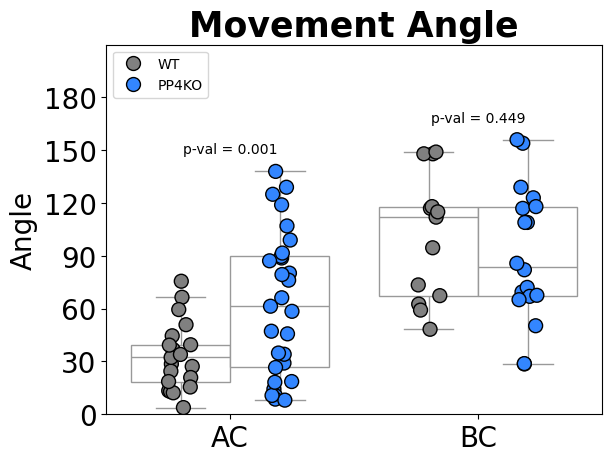

In [5]:
### --- Plotting --- ###
p = ['grey', '#3386FF' ] # classic blue and orange from the rotation saga
sns.stripplot(hue = 'genotype', y = 'angle', data = df,
             x = 'CS', dodge = True, palette = p, 
              size = 10, edgecolor = 'k', linewidth = 1, alpha = 1, legend = True)

sns.boxplot(hue = 'genotype', y = 'angle', data = df,
             x = 'CS', dodge = True, palette = ['w', 'w'],
           legend = False)
plt.legend(loc = 'upper left')
plt.ylim(0,210)
plt.xlabel("", fontweight = 'bold', fontsize = 20)
plt.ylabel("Angle", fontsize = 20)
plt.title("Movement Angle", fontsize = 25, fontweight = 'bold')
plt.xticks(['AC', 'BC'], fontsize = 20)
plt.yticks([0, 30, 60, 90, 120, 150, 180], fontsize = 20)

### --- Stats --- ###
param1 = df[(df['CS']=="AC") & (df['genotype']=="WT")]['angle'].dropna()
param2 = df[(df['CS']=="AC") & (df['genotype']=="PP4KO")]['angle'].dropna()
independent_ttest(param1, param2, 0.05)[3]
ac_stat = np.round(independent_ttest(param1, param2, 0.05)[3], decimals = 3)

plt.annotate(f"p-val = {ac_stat}", xy = (0, param2.max()+10), ha = 'center')

param1 = df[(df['CS']=="BC") & (df['genotype']=="WT")]['angle'].dropna()
param2 = df[(df['CS']=="BC") & (df['genotype']=="PP4KO")]['angle'].dropna()
bc_stat = np.round(independent_ttest(param1, param2, 0.05)[3], decimals = 3)

plt.annotate(f"p-val = {bc_stat}", xy = (1, param2.max()+10), ha = 'center')

plt.savefig('centrosome_angle.png', bbox_inches = 'tight', dpi = 900)
plt.savefig('centrosome_angle.svg', bbox_inches = 'tight', dpi = 900)
plt.show();

# 2024-11-25 redoing plots
- Re-plotting the data as radial plots.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


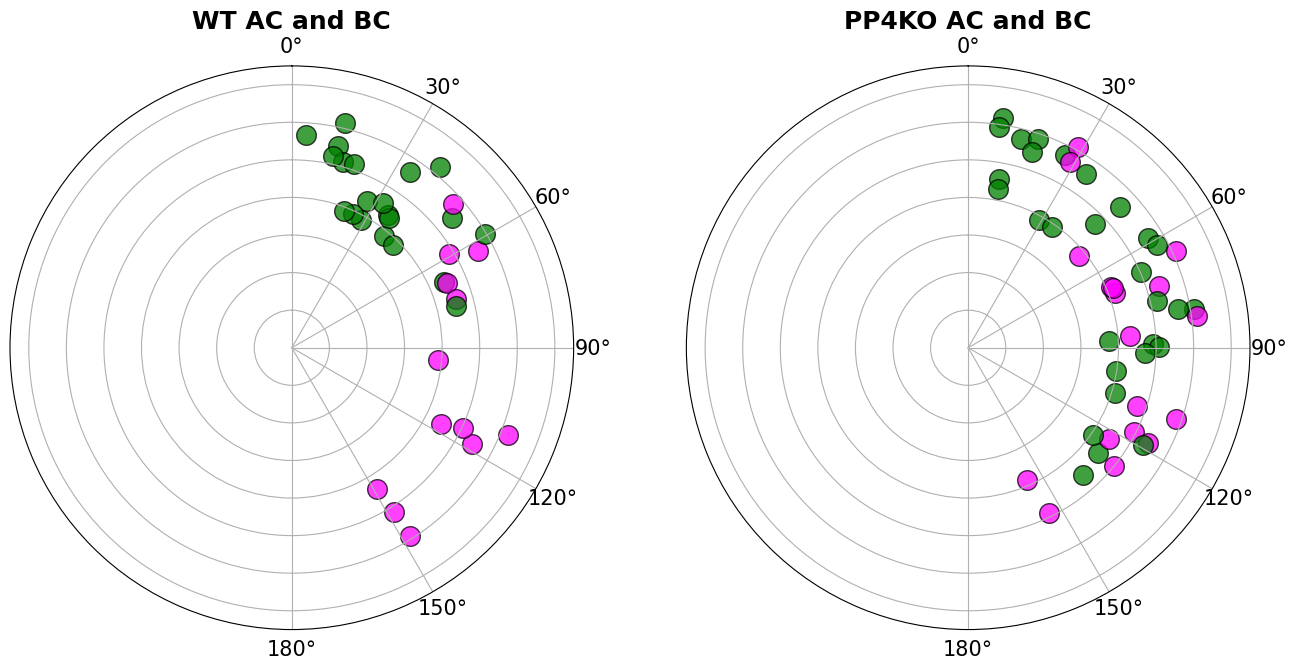

In [6]:
# Add jitter to avoid overlapping points
jitter_strength = 0.25  # Adjust the jitter strength as needed
df['angle_rad'] = np.deg2rad(df['angle'])
df['radius_jittered'] = 1 + np.random.uniform(-jitter_strength, jitter_strength, len(df))

# Define marker shapes and colors
markers = {'WT': 'o', 'PP4KO': 'o'}
palette = {'AC': 'green', 'BC': 'magenta'}

# Create subplots for AC and BC
fig, axs = plt.subplots(1, 2, figsize=(16, 8), subplot_kw={'polar': True})

# Function to plot data
def plot_data(ax, cs_value, title):
    subset = df[df['genotype'] == cs_value]
    for _, row in subset.iterrows():
        ax.scatter(row['angle_rad'], row['radius_jittered'],
                   color=palette[row['CS']],
                   marker=markers[cs_value],
                   s=200,  # Size of markers
                   edgecolor='k', linewidth=1, alpha = 0.75)
    ax.set_ylim(0, 1.5)  # Adjust the radius limits if necessary
    ax.set_theta_zero_location('N')  # Set the 0 direction to the top
    ax.set_theta_direction(-1)  # Set the direction of theta to clockwise
    ax.set_thetagrids([])  # Turn off the theta grid lines
    ax.set_yticklabels([])  # Turn off the radial grid lines
    ax.set_xticks(np.linspace(0, np.pi, 7))  # Set theta ticks to 0 to 180 degrees
    ax.set_xticklabels(['0°', '30°', '60°', '90°', '120°', '150°', '180°'])  # Custom labels for half-circle
    ax.set_title(title, fontsize = 18, fontweight = 'bold')
    ax.tick_params(axis='x', which='major', labelsize=15)
    ax.legend().set_visible(False)  # Turn off the legend
    
    # Overlay a white patch to hide the unwanted half-circle
    ax.fill_between(np.linspace(np.pi, 2*np.pi, 100), 0, 1.5, color='white')

# Plot for AC
plot_data(axs[0], 'WT', 'WT AC and BC')

# Plot for BC
plot_data(axs[1], 'PP4KO', 'PP4KO AC and BC')

# Display the plot
plt.savefig('radial_centrosome_angle_alt.png', bbox_inches = 'tight', dpi = 900)
plt.savefig('radial_centrosome_angle_alt.svg', bbox_inches = 'tight', dpi = 900)
plt.show();

# Stat tests

In [7]:
param1 = df[(df['CS']=="AC") & (df['genotype']=="WT")]['angle'].dropna()
print(f"WT AC mean = {param1.mean()}, stdev = {param1.std()}")
print('')
param1 = df[(df['CS']=="BC") & (df['genotype']=="WT")]['angle'].dropna()
print(f"WT BC mean = {param1.mean()}, stdev = {param1.std()}")
print('')
param1 = df[(df['CS']=="AC") & (df['genotype']=="PP4KO")]['angle'].dropna()
print(f"PP4KO AC mean = {param1.mean()}, stdev = {param1.std()}")
print('')
param1 = df[(df['CS']=="BC") & (df['genotype']=="PP4KO")]['angle'].dropna()
print(f"PP4KO BC mean = {param1.mean()}, stdev = {param1.std()}")

WT AC mean = 32.98571428571429, stdev = 18.78907357253906

WT BC mean = 100.96923076923078, stdev = 35.950484109289924

PP4KO AC mean = 62.16034482758621, stdev = 40.6205560631172

PP4KO BC mean = 90.6611111111111, stdev = 38.234649190136565
